### 1. Бэггинг

Ранее мы говорили про разные алгоритмы классификации, а также научились
правильно валидироваться и оценивать качество модели. Но что делать, если вы уже
нашли лучшую модель и повысить точность модели больше не можете? В таком случае
нужно применить более продвинутые техники машинного обучения, которые можно
объединить словом «ансамбли».

Ансамбль — это некая совокупность, части которой образуют единое целое. Из
повседневной жизни вы знаете музыкальные ансамбли, где объединены несколько
музыкальных инструментов, архитектурные ансамбли с разными зданиями и т.д.



#### Ансамбли

Хорошим примером ансамблей считается теорема Кондорсе «о жюри присяжных» (1784).
Если каждый член жюри присяжных имеет независимое мнение, и если вероятность
правильного решения члена жюри больше 0.5, то тогда вероятность правильного
решения присяжных в целом возрастает с увеличением количества членов жюри и
стремится к единице. Если же вероятность быть правым у каждого из членов жюри
меньше 0.5, то вероятность принятия правильного решения присяжными в целом
монотонно уменьшается и стремится к нулю с увеличением количества присяжных.

Давайте рассмотрим ещё один пример ансамблей — "Мудрость толпы". Фрэнсис Гальтон
в 1906 году посетил рынок, где проводилась некая лотерея для крестьян. Их
собралось около 800 человек, и они пытались угадать вес быка, который стоял
перед ними. Бык весил 1198 фунтов. Ни один крестьянин не угадал точный вес быка,
но если посчитать среднее от их предсказаний, то получим 1197 фунтов. Эту идею
уменьшения ошибки применили и в машинном обучении.

#### Бутстрэп

Bagging (от Bootstrap aggregation) — это один из первых и самых простых видов
ансамблей. Он был придуман Ле́о Бре́йманом в 1994 году. Бэггинг основан на
статистическом методе бутстрэпа, который позволяет оценивать многие статистики
сложных распределений.


Метод бутстрэпа заключается в следующем. Пусть имеется выборка $\large X$
размера $\large N$. Равномерно возьмем из выборки $\large N$ объектов с
возвращением. Это означает, что мы будем $\large N$ раз выбирать произвольный
объект выборки (считаем, что каждый объект «достается» с одинаковой вероятностью
$\large \frac{1}{N}$), причем каждый раз мы выбираем из всех исходных $\large N$
объектов. Можно представить себе мешок, из которого достают шарики: выбранный на
каком-то шаге шарик возвращается обратно в мешок, и следующий выбор опять
делается равновероятно из того же числа шариков. Отметим, что из-за возвращения
среди них окажутся повторы. Обозначим новую выборку через $\large X_1$. Повторяя
процедуру $\large M$ раз, сгенерируем $\large M$ подвыборок $\large X_1, \dots,
X_M$. Теперь мы имеем достаточно большое число выборок и можем оценивать
различные статистики исходного распределения.



![bootstrap](bootstrap.jpg)

#### Бэггинг

Теперь вы имеете представление о бутстрэпе, и мы можем перейти непосредственно к
бэггингу. Пусть имеется обучающая выборка $\large X$. С помощью бутстрэпа
сгенерируем из неё выборки $\large X_1, \dots, X_M$. Теперь на каждой выборке
обучим свой классификатор $\large a_i(x)$. Итоговый классификатор будет
усреднять ответы всех этих алгоритмов (в случае классификации это соответствует
голосованию): $\large a(x) = \frac{1}{M}\sum_{i = 1}^M a_i(x)$. Эту схему можно
представить картинкой ниже.

![Bagging](bagging.png)

Рассмотрим задачу регрессии с базовыми алгоритмами $\large b_1(x), \dots ,
b_n(x)$. Предположим, что существует истинная функция ответа для всех объектов
$\large y(x)$, а также задано распределение на объектах $\large p(x)$. В этом
случае мы можем записать ошибку каждой функции регрессии


$$ \large \varepsilon_i(x) = b_i(x) - y(x), i = 1, \dots, n$$


и записать матожидание среднеквадратичной ошибки


$ \mathbb{E}_x\left[\left(b_i(x) - y(x)\right)^{2}\right] =
\mathbb{E}_x\left[\varepsilon_i^{2}(x)\right]. $


Средняя ошибка построенных функций регрессии имеет вид

$ \large \mathbb{E}_1 = \frac{1}{n}\mathbb{E}_x \sum_{i=1}^n
\varepsilon_i^{2}(x) $



Предположим, что ошибки несмещены и некоррелированы:


$ \large \begin{array}{rcl} \mathbb{E}_x\varepsilon_i(x) &=& 0, \\
\mathbb{E}_x\varepsilon_i(x)\varepsilon_j(x) &=& 0, i \neq j. \end{array} $


Построим теперь новую функцию регрессии, которая будет усреднять ответы
построенных нами функций:


$ \large a(x) = \frac{1}{n}\sum_{i=1}^{n}b_i(x) $


Найдем ее среднеквадратичную ошибку:


$ \large \begin{array}{rcl}\mathbb{E}_n &=&
\mathbb{E}_x\Big(\frac{1}{n}\sum_{i=1}^{n}b_i(x)-y(x)\Big)^2 \\ &=&
\mathbb{E}_x\Big(\frac{1}{n}\sum_{i=1}^{n}\varepsilon_i\Big)^2 \\ &=&
\frac{1}{n^2}\mathbb{E}_x\Big(\sum_{i=1}^{n}\varepsilon_i^2(x) + \sum_{i \neq
j}\varepsilon_i(x)\varepsilon_j(x)\Big) \\ &=&
\frac{1}{n}\mathbb{E}_1\end{array}$


Таким образом, усреднение ответов позволило уменьшить средний квадрат ошибки в n
раз!

Бэггинг позволяет снизить дисперсию (variance) обучаемого классификатора,
уменьшая величину, на сколько ошибка будет отличаться, если обучать модель на
разных наборах данных, или другими словами, предотвращает переобучение.
Эффективность бэггинга достигается благодаря тому, что базовые алгоритмы,
обученные по различным подвыборкам, получаются достаточно различными, и их
ошибки взаимно компенсируются при голосовании, а также за счёт того, что
объекты-выбросы могут не попадать в некоторые обучающие подвыборки.



В библиотеке scikit-learn есть реализации BaggingRegressor и BaggingClassifier,
которые позволяют использовать большинство других алгоритмов "внутри".

#### Out-of-bag error

Забегая вперед, отметим, что при использовании случайных лесов нет необходимости
в кросс-валидации или в отдельном тестовом наборе, чтобы получить несмещенную
оценку ошибки набора тестов. Посмотрим, как получается "внутренняя" оценка
модели во время ее обучения.


Каждое дерево строится с использованием разных образцов бутстрэпа из исходных
данных. Примерно 37% примеров остаются вне выборки бутстрэпа и не используются
при построении k-го дерева.


Это можно легко доказать: пусть в выборке $\large \ell$ объектов. На каждом шаге
все объекты попадают в подвыборку с возвращением равновероятно, т.е отдельный
объект — с вероятностью $\large\frac{1}{\ell}.$ Вероятность того, что объект НЕ
попадет в подвыборку (т.е. его не взяли $\large \ell$ раз): $\large (1 -
\frac{1}{\ell})^\ell$. При $\large \ell \rightarrow +\infty$ получаем один из
"замечательных" пределов $\large \frac{1}{e}$. Тогда вероятность попадания
конкретного объекта в подвыборку $\large \approx 1 - \frac{1}{e} \approx 63\%$.

Получается, что каждый базовый алгоритм обучается на ~63% исходных объектов.
Значит, на оставшихся ~37% его можно сразу проверять. Out-of-Bag оценка — это
усредненная оценка базовых алгоритмов на тех ~37% данных, на которых они не
обучались.

### 2. Случайный лес

Лео Брейман нашел применение бутстрэпу не только в статистике, но и в машинном
обучении. Он вместе с Адель Катлер усовершенстовал алгоритм случайного леса,
предложенный Хо, добавив к первоначальному варианту построение некоррелируемых
деревьев на основе CART, в сочетании с методом случайных подпространств и
бэггинга.


Решающие деревья являются хорошим семейством базовых классификаторов для
бэггинга, поскольку они достаточно сложны и могут достигать нулевой ошибки на
любой выборке. Метод случайных подпространств позволяет снизить
коррелированность между деревьями и избежать переобучения. Базовые алгоритмы
обучаются на различных подмножествах признакового описания, которые также
выделяются случайным образом.

Ансамбль моделей, использующих метод случайного подпространства, можно
построить, используя следующий алгоритм:

1. Пусть количество объектов для обучения равно $\large N$, а количество
признаков $\large D$.

2. Выберите $\large L$ как число отдельных моделей в ансамбле.

3. Для каждой отдельной модели $\large l$ выберите $\large dl (dl < D) $ как
число признаков для $\large l$. Обычно для всех моделей используется только одно
значение $\large dl$.

4. Для каждой отдельной модели $\large l$ создайте обучающую выборку, выбрав
$\large dl$ признаков из $\large D$, и обучите модель.

5. Теперь, чтобы применить модель ансамбля к новому объекту, объедините
результаты отдельных $\large L$ моделей мажоритарным голосованием или путем
комбинирования апостериорных вероятностей.


Алгоритм построения случайного леса, состоящего из $\large N$ деревьев, выглядит
следующим образом:

Для каждого $\large n = 1, \dots, N$:
* Сгенерировать выборку $\large X_n$ с помощью бутстрэпа;
* Построить решающее дерево $\large b_n$ по выборке $\large X_n$:
    1. По заданному критерию мы выбираем лучший признак, делаем разбиение в
дереве по нему и так до исчерпания выборки.
    2. Дерево строится, пока в каждом листе не более $\large n_\text{min}$
объектов или пока не достигнем определенной высоты дерева.
    3. при каждом разбиении сначала выбирается $\large m$ случайных признаков из
$\large n$ исходных, и оптимальное разделение выборки ищется только среди них.


Итоговый классификатор

$$\large a(x) = \frac{1}{N}\sum_{i = 1}^N b_i(x)$$

Простыми словами — для задачи кассификации мы выбираем решение голосованием по
большинству, а в задаче регрессии — средним.

Рекомендуется в задачах классификации брать $\large m = \sqrt{n}$, а в задачах
регрессии — $\large m = \frac{n}{3}$, где $\large n$ — число признаков. Также
рекомендуется в задачах классификации строить каждое дерево до тех пор, пока в
каждом листе не окажется по одному объекту, а в задачах регрессии — пока в
каждом листе не окажется по пять объектов.


Таким образом, случайный лес — это бэггинг над решающими деревьями, при обучении
которых для каждого разбиения признаки выбираются из некоторого случайного
подмножества признаков.

### Перейдем к практике

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor, BaggingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6

Populating the interactive namespace from numpy and matplotlib


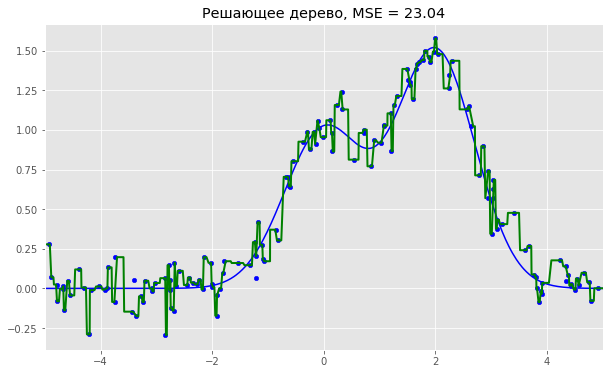

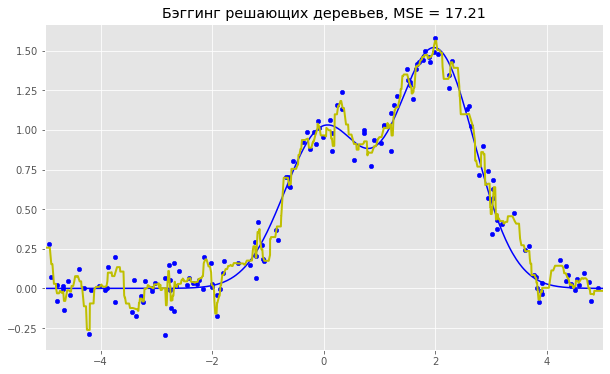

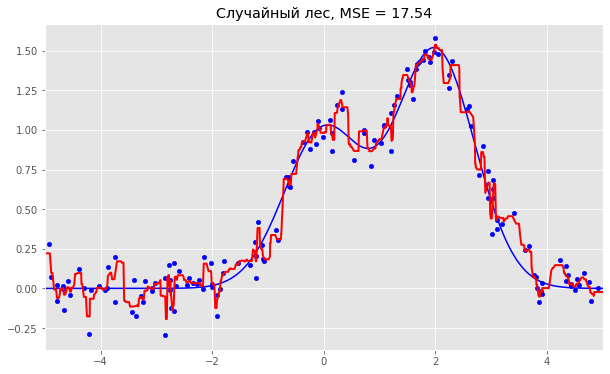

In [6]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
%pylab inline


n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Решающее дерево, MSE = %.2f" 
          % np.sum((y_test - d_predict) ** 2))

bdt = BaggingRegressor(DecisionTreeRegressor(max_depth=100), n_estimators=10).fit(X_train, y_train)
bdt_predict = bdt.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, bdt_predict, "y", lw=2)
plt.xlim([-5, 5])
plt.title("Бэггинг решающих деревьев, MSE = %.2f" % np.sum((y_test - bdt_predict) ** 2));

rf = RandomForestRegressor(n_estimators=10, max_depth=100).fit(X_train, y_train)
rf_predict = rf.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "r", lw=2)
plt.xlim([-5, 5])
plt.title("Случайный лес, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));

Основное различие случайного леса и бэггинга на деревьях решений заключается в
том, что в случайном лесе выбирается случайное подмножество признаков, и лучший
признак для разделения узла определяется из подвыборки признаков, в отличие от
бэггинга, где все функции рассматриваются для разделения в узле.

In [8]:
df = pd.read_csv("prepared_data.csv")
df['Sex'] = pd.factorize(df['Sex'])[0]
df['Embarked'] = pd.factorize(df['Embarked'])[0]
df['Name_Prefix'] = pd.factorize(df['Name_Prefix'])[0]
df['TicketPre'] = pd.factorize(df['TicketPre'])[0]
df['TicketNum_Groups'] = pd.factorize(df['TicketNum_Groups'])[0]
df['Lastname'] = pd.factorize(df['Lastname'])[0]

In [9]:
df.dropna(inplace=True)
ans = df['Survived']
df.drop(['Survived'], axis=1, inplace=True)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Prefix,Lastname,TicketPre,TicketNum_Groups,Relatives
0,3,0,22.0,1,0,7.2500,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,1,1,1,1
2,3,1,26.0,0,0,7.9250,0,2,2,2,2,0
3,1,1,35.0,1,0,53.1000,0,1,3,3,3,1
4,3,0,35.0,0,0,8.0500,0,0,4,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0,5,664,3,440,0
887,1,1,19.0,0,0,30.0000,0,2,233,3,370,0
888,3,1,24.0,1,2,23.4500,0,2,604,11,417,3
889,1,0,26.0,0,0,30.0000,1,0,665,3,441,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df, ans, test_size=0.33)

In [11]:
dtree = DecisionTreeClassifier().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

bdt = BaggingClassifier(DecisionTreeClassifier(max_depth=100), n_estimators=10).fit(X_train, y_train)
bdt_predict = bdt.predict(X_test)

rf = RandomForestClassifier(n_estimators=10, max_depth=100).fit(X_train, y_train)
rf_predict = rf.predict(X_test)

In [12]:
print('DecisionTreeRegressor: ', accuracy_score(y_test, d_predict))
print('BaggingRegressor and DecisionTreeRegressor: ', accuracy_score(y_test, bdt_predict))
print('RandomForestRegressor: ', accuracy_score(y_test, rf_predict))

DecisionTreeRegressor:  0.7728813559322034
BaggingRegressor and DecisionTreeRegressor:  0.7932203389830509
RandomForestRegressor:  0.8203389830508474


In [13]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1, 50),
               'max_features': range(4, df.shape[1])}

dtree_grid = GridSearchCV(dtree, tree_params,
                         cv=5, n_jobs=-1,
                         verbose=True)

dtree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 392 candidates, totalling 1960 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 50),
                         'max_features': range(4, 12)},
             verbose=True)

In [14]:
dgrid_predict = dtree_grid.predict(X_test)
print('DecisionTreeRegressor with GridSearch: ', accuracy_score(y_test, dgrid_predict))

DecisionTreeRegressor with GridSearch:  0.8


#### Параметры

Метод случайного леса реализован в библиотеке машинного обучения scikit-learn
двумя классами RandomForestClassifier и RandomForestRegressor.

Есть несколько параметров, на которые в первую очередь стоит обратить внимание
при построении модели:

* n_estimators — число деревьев в "лесу"
* criterion — критерий для разбиения выборки в вершине
* max_features — число признаков, по которым ищется разбиение
* min_samples_leaf — минимальное число объектов в листе
* max_depth — максимальная глубина дерева

#### Сверхслучайные деревья

В сверхслучайных деревьях (Extremely Randomized Trees) больше случайности в том,
как вычисляются разделения в узлах. Как и в случайных лесах, используется
случайное подмножество возможных признаков, но вместо поиска наиболее
оптимальных порогов, пороговые значения произвольно выбираются для каждого
возможного признака, и наилучший из этих случайно генерируемых порогов
выбирается как лучшее правило для разделения узла. Это обычно позволяет немного
уменьшить дисперсию модели за счет несколько большего увеличения смещения.

В библиотеке scikit-learn есть реализация ExtraTreesClassifier и
ExtraTreesRegressor. Данный метод стоит использовать, когда вы сильно
переобучаетесь на случайном лесе или градиентном бустинге.

#### Плюсы случайного леса

1. Хорошо работает из коробки (хорошо работает без настройки гиперпараметры, с минимальной предобработкой данных, не нужно использовать кросс валидацию)
2. Можно распаралелить обучение деревьев, в том числе на разных компьютерах.
3. Как ни странно алгоритм устойчив к переобучению.

## Градиентный бустинг

В основе алгоритма также лежит идея ансамблей, только более приближенная к зоопарку моделей, который используют в продакшене. Ближайшую аналогию можно провести с физикой и соединениями приборов. Идеей параллельного соединения является алгоритм случайного леса, который был рассмотрен выше. Идею последовательного соединению использует самый популярный на сегодняшний день алгоритм градиентного бустинга.

Углубимся немного в историю: ранее самым популярным алгоритмом считался метод опорных векторов SVM. Но потом был придуман алгоритм градиентного бустинга. Первоначальной реализацией бустинга пользовались мало, однако спустя некоторе время начала придумывать его различные модификации, благодаря которым он вытеснил SVM. Сегодня у всех больших компаний есть свои реализации бустинга.

Идея самого алгоритма проста и схожа с идеей градиентного спуска - обучение на ошибках, только в отличии от спуска модель учится не на ошибках ее самой, а на ошибках предыдущей модели.

Логика, что стоит за градиентым бустингом, проста, ее можно понять интуитивно, без математического формализма. Предполагается, что читатель знаком с простой линейной регрессией.
Первое предположение линейной регресии, что сумма отклонений = 0, т.е. отклонения должны быть случайно распределены в окрестности нуля.

Теперь давайте думать о отклонениях, как об ошибках, сделанных нашей моделью. Хотя в моделях основанных на деревьях не делается такого предположения, если мы будем размышлять об этом предположении логически (не статистически), мы можем понять, что увидив принцип распределения отклонений, сможем использовать данный паттерн для модели.

Итак, интуиция за алгоритмом градиентного бустинга — итеративно применять паттерны отклонений и улучшать предсказания. Как только мы достигли момента, когда отклонения не имеют никакого паттерна, мы прекращаем достраивать нашу модель (иначе это может привести к переобучению). Алгоритмически, мы минимизируем нашу функцию потерь.

В итоге:

1. Сначала строим простые модели и анализируем ошибки;
2. Определяем точки, которые не вписываются в простую модель;
3. Добавляем модели, которые обрабатывают сложные случаи, которые были выявлены на начальной модели;
4. Собираем все построенные модели, определяя вес каждого предсказателя.

![Визуализация обучения "слабых" моделей](2.png)

![Результат обучения бустинга](3.png)

In [3]:
import xgboost as xgb

In [24]:
xgb_cl = xgb.XGBClassifier()
tree_params = {'max_depth': range(1, 5),
               'learning_rate': [0.3, 0.1, 0.01, 0.001, 0.0001, 0.00001],
               'min_child_weight': range(1, 5),
               'max_delta_step': range(1, 5)}

dtree_grid = GridSearchCV(xgb_cl, tree_params,
                         cv=5, n_jobs=-1,
                         verbose=True)
dtree_grid.fit(X_train, y_train)
#xgb_cl = xgb.XGBClassifier(learning_rate=0.0001, max_depth=10)
#xgb_cl.fit(X_train, y_train)
preds = dtree_grid.predict(X_test)
accuracy_score(y_test, preds)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


0.8271186440677966

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
preds = gbc.predict(X_test)
accuracy_score(y_test, preds)

0.823728813559322